In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import util

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Duo et al. datasets
dspath=['../data/Koh/koh.h5ad','../data/Kumar/kumar.h5ad', '../data/simkumar/simkumar4easy.h5ad','../data/simkumar/simkumar4hard.h5ad','../data/simkumar/simkumar8hard.h5ad','../data/Trapnell/trapnell.h5ad','../data/zheng/sce_full_Zhengmix4eq.h5ad','../data/zheng/sce_full_Zhengmix4uneq.h5ad','../data/zheng/sce_full_Zhengmix8eq.h5ad']
dsname=['Koh','Kumar','simkumar4easy','simkumar4hard','simkumar8hard','Trapnell','Zheng4eq','Zheng4uneq','Zheng8eq']

removals = [0.025, 0.05, 0.1]
baseline_nmi = [0.809, 0.924, 0.736, 0.196, 0.436, 0.283, 0.637, 0.718, 0.551]
baseline_ari = [0.691, 0.951, 0.606, 0.160, 0.262, 0.267, 0.629, 0.738, 0.399]

def process(data,cs,labels,dimension,fix_ch,removal_type,C=None):
    
    if C is None:
        C = util.get_compression_matrix(data,cs,dimension,True,True)
    
    ari, nmi = util.pca_kmeans(data,len(cs),labels,dimension)
    print('PCA Kmeans: ', ari, nmi)

    ari_rem, nmi_rem = [], []

    for removal in removals: 
        rem_ari, rem_nmi = util.remove_pca_kmeans(data,cs,labels,dimension,removal,True,C,removal_type)
        ari_rem.append(rem_ari)
        nmi_rem.append(rem_nmi)
    
    print('PCA Kmeans with removal: ', ari_rem, nmi_rem)
    return ari_rem, nmi_rem

In [35]:
nmi_resuls = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

ari_results = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

for i in range(len(dspath)):
    data, cs, labels = util.initiate(fix_ch=i, dsname=dsname, dspath=dspath)
    k = len(cs)
    C = np.load(dspath[i][:-5]+'_C_cs.npy')

    print('Dataset: ', dsname[i])
    ari, nmi = process(data,cs,labels,k,i,'compression',C)
    print()

    ari_results['2.5% removal'] += (ari[0] - baseline_ari[i],)
    ari_results['5% removal'] += (ari[1] - baseline_ari[i],)
    ari_results['10% removal'] += (ari[2] - baseline_ari[i],)
    nmi_resuls['2.5% removal'] += (nmi[0] - baseline_nmi[i],)
    nmi_resuls['5% removal'] += (nmi[1] - baseline_nmi[i],)
    nmi_resuls['10% removal'] += (nmi[2] - baseline_nmi[i],)

Dataset:  Koh
PCA Kmeans:  0.6912741185567662 0.8240027568302385
PCA Kmeans with removal:  [0.7102997364263625, 0.8488573458224364, 0.8821063268545484] [0.8219599016723411, 0.9000902503158129, 0.9273295921862076]

Dataset:  Kumar
PCA Kmeans:  0.9507837448896125 0.923781516234857
PCA Kmeans with removal:  [1.0, 1.0, 1.0] [1.0, 1.0, 1.0]

Dataset:  simkumar4easy
PCA Kmeans:  0.6205216858095304 0.7442443975455176
PCA Kmeans with removal:  [0.6335259801673694, 0.635247942257319, 0.6294851818323872] [0.8009697792633819, 0.801157155555881, 0.8002458146110647]

Dataset:  simkumar4hard
PCA Kmeans:  0.15944785927862282 0.23295021931483853
PCA Kmeans with removal:  [0.15491552110508197, 0.16268215025011482, 0.15894660669825073] [0.23411923005502844, 0.2417004274750626, 0.24968268497994156]

Dataset:  simkumar8hard
PCA Kmeans:  0.287195383117175 0.45209330443958806
PCA Kmeans with removal:  [0.26820477396716647, 0.36451432183266275, 0.400494026948748] [0.43527655910791974, 0.5004539233210049, 0.5

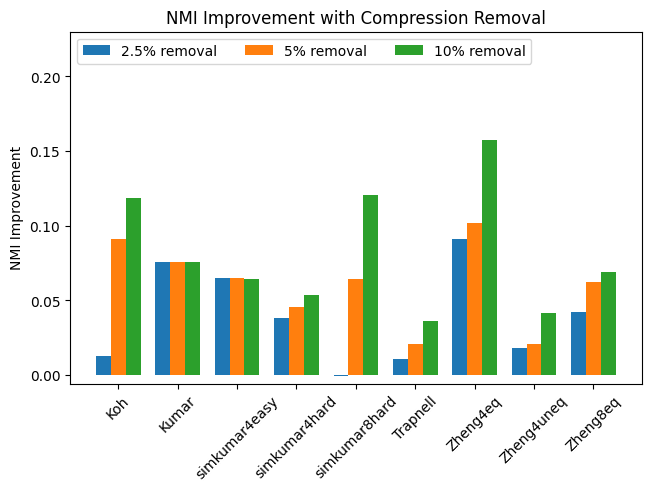

In [41]:
util.improvement_graph(dsname, nmi_resuls,"NMI Improvement with Compression Removal")

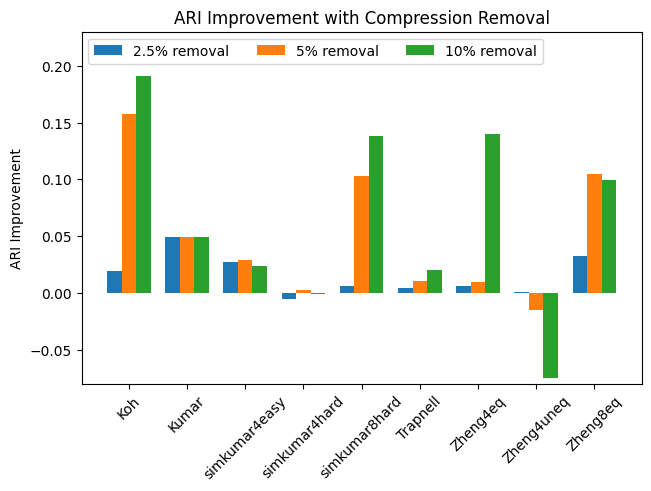

In [40]:
util.improvement_graph(dsname, ari_results, "ARI Improvement with Compression Removal", "ARI")

In [4]:
nmi_plus5 = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

ari_plus5 = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

for i in range(len(dspath)):
    data, cs, labels = util.initiate(fix_ch=i, dsname=dsname, dspath=dspath)
    k = len(cs) + 5

    print('Dataset: ', dsname[i])
    ari, nmi = process(data,cs,labels,k,i,'compression')
    print()

    ari_plus5['2.5% removal'] += (ari[0] - baseline_ari[i],)
    ari_plus5['5% removal'] += (ari[1] - baseline_ari[i],)
    ari_plus5['10% removal'] += (ari[2] - baseline_ari[i],)
    nmi_plus5['2.5% removal'] += (nmi[0] - baseline_nmi[i],)
    nmi_plus5['5% removal'] += (nmi[1] - baseline_nmi[i],)
    nmi_plus5['10% removal'] += (nmi[2] - baseline_nmi[i],)

Dataset:  Koh
PCA Kmeans:  0.7784357305895035 0.8466098548039267
PCA Kmeans with removal:  [0.8216116029748214, 0.7584986559070287, 0.8944648573674817] [0.8805113309411238, 0.8810469511326804, 0.9271173795599684]

Dataset:  Kumar
PCA Kmeans:  0.9507837448896125 0.923781516234857
PCA Kmeans with removal:  [0.9864368866369996, 1.0, 1.0] [0.978886590067838, 1.0, 1.0]

Dataset:  simkumar4easy
PCA Kmeans:  0.6103936240861817 0.7434051452909286
PCA Kmeans with removal:  [0.3561032044345753, 0.37080939577280486, 0.386515944328467] [0.4837423986001239, 0.5159030330979336, 0.5331580992051402]

Dataset:  simkumar4hard
PCA Kmeans:  0.10807719474500312 0.1982627831626026
PCA Kmeans with removal:  [0.1584877817657728, 0.15576761342559098, 0.16550762587793014] [0.23191729284213802, 0.23297119082445517, 0.23988948053050496]

Dataset:  simkumar8hard
PCA Kmeans:  0.28444150661947964 0.4282152210576623
PCA Kmeans with removal:  [0.26717445342000234, 0.29406471993371963, 0.28174912040012495] [0.429397722

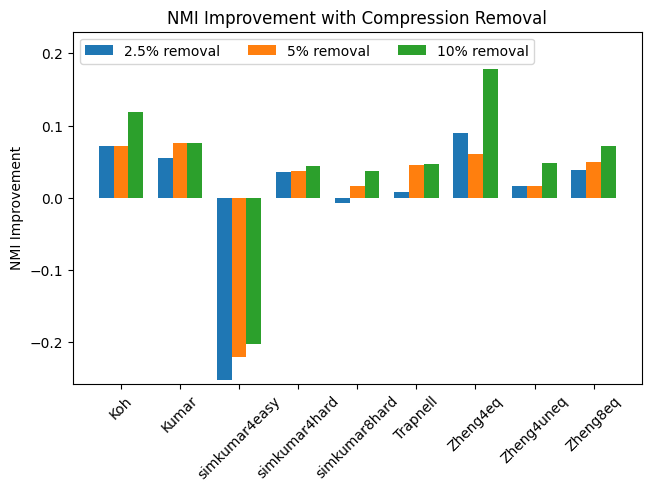

In [5]:
util.improvement_graph(dsname, nmi_plus5,"NMI Improvement with Compression Removal")

In [10]:
for i in range(2, 3):
    data, cs, labels = util.initiate(fix_ch=i, dsname=dsname, dspath=dspath)
    k = len(cs) + 5

    print('Dataset: ', dsname[i])
    ari, nmi = process(data,cs,labels,k,i,'compression')

Dataset:  simkumar4easy
PCA Kmeans:  0.6107960600748805 0.7434051452909286
PCA Kmeans with removal:  [0.6337690793669007, 0.6356318626216075, 0.6340442575520527] [0.786977523505061, 0.8028308449319705, 0.8058621452676908]


In [20]:
for i in range(2, 3):
    data, cs, labels = util.initiate(fix_ch=i, dsname=dsname, dspath=dspath)
    k = len(cs) + 5

    print('Dataset: ', dsname[i])
    process(data,cs,labels,k,i,'compression')

Dataset:  simkumar4easy
PCA Kmeans:  0.6165389494991904 0.7459381941916728
[(0.6281670593778589, 0.7791522105542853), (0.6281670593778589, 0.7791522105542853), (0.6281670593778589, 0.7791522105542853), (0.6281670593778589, 0.7791522105542853), (0.6281670593778589, 0.7791522105542853)]
[(0.6326678912930335, 0.801343202736734), (0.6326678912930335, 0.801343202736734), (0.6326678912930335, 0.801343202736734), (0.6326678912930335, 0.801343202736734), (0.6326678912930335, 0.801343202736734)]
[(0.6393954591525004, 0.8061707327073355), (0.6393954591525004, 0.8061707327073355), (0.6393954591525004, 0.8061707327073355), (0.6393954591525004, 0.8061707327073355), (0.6393954591525004, 0.8061707327073355)]
PCA Kmeans with removal:  [0.6281670593778589, 0.6326678912930335, 0.6393954591525004] [0.7791522105542853, 0.801343202736734, 0.8061707327073355]


In [5]:
nmi_det = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

ari_det = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

b_ari = []
b_nmi = []

for i in range(len(dspath)):
    data, cs, labels = util.initiate(fix_ch=i, dsname=dsname, dspath=dspath)
    k = len(cs)

    print('Dataset: ', dsname[i])
    C = np.load(dspath[i][:-5]+'_C_cs.npy')
    ari, nmi = process(data,cs,labels,k,i,'compression',C)
    print()

    ari_det['2.5% removal'] += (ari[0] - b_ari[i],)
    ari_det['5% removal'] += (ari[1] - b_ari[i],)
    ari_det['10% removal'] += (ari[2] - b_ari[i],)
    nmi_det['2.5% removal'] += (nmi[0] - b_nmi[i],)
    nmi_det['5% removal'] += (nmi[1] - b_nmi[i],)
    nmi_det['10% removal'] += (nmi[2] - b_nmi[i],)

Dataset:  Koh
PCA Kmeans:  0.7866517414214749 0.850009272071119
PCA Kmeans with removal:  [0.7131511372848195, 0.8488573458224364, 0.8821063268545484] [0.8447772813350615, 0.9000902503158129, 0.9273295921862076]

Dataset:  Kumar
PCA Kmeans:  0.9507837448896125 0.923781516234857
PCA Kmeans with removal:  [1.0, 1.0, 1.0] [1.0, 1.0, 1.0]

Dataset:  simkumar4easy
PCA Kmeans:  0.6254960515265924 0.7434501445203958
PCA Kmeans with removal:  [0.6349285733910098, 0.635247942257319, 0.6294851818323872] [0.8013053479175926, 0.801157155555881, 0.8002458146110646]

Dataset:  simkumar4hard
PCA Kmeans:  0.21600621756810723 0.27335634643614604
PCA Kmeans with removal:  [0.15491552110508197, 0.1610458668709704, 0.22601671196254777] [0.23411923005502844, 0.23604791822226007, 0.30097532106133107]

Dataset:  simkumar8hard
PCA Kmeans:  0.2632242918483651 0.4352833825985789
PCA Kmeans with removal:  [0.24682251044868067, 0.3859669580050364, 0.29533838007897784] [0.4455712146113199, 0.518674371916168, 0.488

In [7]:
nmi_det

{'2.5% removal': (array([ 0.        , -0.05531297, -0.08255231]),
  array([0., 0., 0.]),
  array([0.        , 0.00014819, 0.00105953]),
  array([ 0.        , -0.00192869, -0.06685609]),
  array([ 0.        , -0.07310316, -0.04327543]),
  array([ 0.        , -0.01648921, -0.02565127]),
  array([ 0.        , -0.00965075, -0.0003316 ]),
  array([ 0.        , -0.22084944, -0.24237271]),
  array([ 0.        , -0.01607265, -0.01943791])),
 '5% removal': (array([ 0.05531297,  0.        , -0.02723934]),
  array([0., 0., 0.]),
  array([-0.00014819,  0.        ,  0.00091134]),
  array([ 0.00192869,  0.        , -0.0649274 ]),
  array([0.07310316, 0.        , 0.02982773]),
  array([ 0.01648921,  0.        , -0.00916206]),
  array([0.00965075, 0.        , 0.00931915]),
  array([ 0.22084944,  0.        , -0.02152327]),
  array([ 0.01607265,  0.        , -0.00336526])),
 '10% removal': (array([0.08255231, 0.02723934, 0.        ]),
  array([0., 0., 0.]),
  array([-0.00105953, -0.00091134,  0.        